In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import statistics

In [24]:
df_bikeShare = pd.read_csv('bikeshare-dataset-2020.csv')

In [ ]:
#how many rows (instances)? How many columns (variables)? Describe each of the variables

In [26]:
df_bikeShare.columns

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')

In [ ]:
df_bikeShare.shape[0]

In [ ]:
df_bikeShare['Trip Id'].describe()

In [ ]:
df_bikeShare['Trip  Duration'].describe()

In [ ]:
df_bikeShare['Start Station Id'].describe()

In [ ]:
df_bikeShare['Start Time'].describe()

In [ ]:
df_bikeShare['Start Station Name'].describe()

In [ ]:
df_bikeShare['End Station Id'].describe()

In [ ]:
df_bikeShare['Bike Id'].describe()

In [ ]:
df_bikeShare['User Type'].describe()

In [ ]:
df_bikeShare.nunique()

In [27]:
#remove rows with missing values
df_bikeShare.dropna(axis='rows', how='any', inplace=True)

In [28]:
#convert 'Trip Duration' data type to numeric
df = pd.DataFrame(df_bikeShare)
df['Trip  Duration'] = pd.to_numeric(df['Trip  Duration'])

In [29]:
#convert 'Start Time' and 'End Time' data typeto date time 
from datetime import datetime
df['Start Time'] =  pd.to_datetime(df['Start Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [30]:
df['End Time'] =  pd.to_datetime(df['End Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [31]:
#split out start date column into day, month, year, time columns
df['Start Year'] = df['Start Time'].dt.year
df['Start Month'] = df['Start Time'].dt.month
df['Start Day'] = df['Start Time'].dt.day

df['End Year'] = df['End Time'].dt.year
df['End Month'] = df['End Time'].dt.month
df['End Day'] = df['End Time'].dt.day

In [32]:
df['Trip Start Time'] = df['Start Time'].dt.time

df['Trip End Time'] = df['End Time'].dt.time

In [33]:
df_bikeShare.dropna(axis='rows', how='any', inplace=True)

In [34]:
#Delete redundant columns
df_bikeShare.drop(['Start Time', 'End Time'], axis=1, inplace=True)

In [36]:
print (df.dtypes)

Trip Id                       object
Trip  Duration               float64
Start Station Id              object
Start Time            datetime64[ns]
Start Station Name            object
End Station Id                object
End Time              datetime64[ns]
End Station Name              object
Bike Id                       object
User Type                     object
Start Year                     int64
Start Month                    int64
Start Day                      int64
End Year                       int64
End Month                      int64
End Day                        int64
Trip Start Time               object
Trip End Time                 object
dtype: object


In [37]:
#Remove outliers - trip duration 1.5*IQR away from the median 
sorted('Trip  Duration')

Q1 = df_bikeShare['Trip  Duration'].quantile(0.25)
Q3 = df_bikeShare['Trip  Duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

791.0


In [39]:
dataset_outliersrm = df_bikeShare[~((df_bikeShare['Trip  Duration'] < (Q1 - 1.5 * IQR)) |(df_bikeShare['Trip  Duration'] > (Q3 + 1.5 * IQR)))]
dataset_outliersrm

,Trip Id,Trip Duration,Start Station Id,Start Station Name,End Station Id,End Station Name,Bike Id,User Type,Start Year,Start Month,Start Day,End Year,End Month,End Day,Trip Start Time,Trip End Time
0,7334128,648.0,7003,Madison Ave / Bloor St W,7271,Yonge St / Alexander St - SMART,3104,Annual Member,2020,1,1,2020,1,1,00:08:00,00:19:00
1,7334129,419.0,7007,College St / Huron St,7163,Yonge St / Wood St,2126,Annual Member,2020,1,1,2020,1,1,00:10:00,00:17:00
2,7334130,566.0,7113,Parliament St / Aberdeen Ave,7108,Front St E / Cherry St,4425,Annual Member,2020,1,1,2020,1,1,00:13:00,00:22:00
3,7334131,1274.0,7333,King St E / Victoria St,7311,Sherbourne St / Isabella St,4233,Annual Member,2020,1,1,2020,1,1,00:17:00,00:38:00
4,7334132,906.0,7009,King St E / Jarvis St,7004,University Ave / Elm St,2341,Casual Member,2020,1,1,2020,1,1,00:19:00,00:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911303,10644213,330.0,7010,King St W / Spadina Ave,7216,Wellington St W / Stafford St,3458,Annual Member,2020,12,31,2020,12,31,23:52:00,23:57:00
2911304,10644214,216.0,7288,Humber Bay Shores Park West,7514,Humber Bay Shores Park / Marine Parade Dr,4085,Annual Member,2020,12,31,2020,12,31,23:54:00,23:58:00
2911305,10644215,204.0,7288,Humber Bay Shores Park West,7514,Humber Bay Shores Park / Marine Parade Dr,3580,Annual Member,2020,12,31,2020,12,31,23:54:00,23:58:00
2911306,10644216,1659.0,7270,Church St / Dundas St E - SMART,7270,Church St / Dundas St E - SMART,5137,Annual Member,2020,12,31,2021,1,1,23:56:00,00:24:00


In [42]:
#apply correlation to look for features to use in models
import matplotlib.pyplot as plt
import seaborn as sn

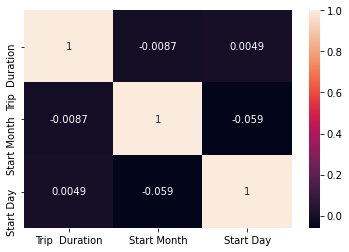

In [51]:
data = dataset_outliersrm

df = pd.DataFrame(data,columns=['Trip  Duration', 'Start Month', 'Start Day', 'Trip Start Time', 'Trip End Time'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot = True)
plt.show()

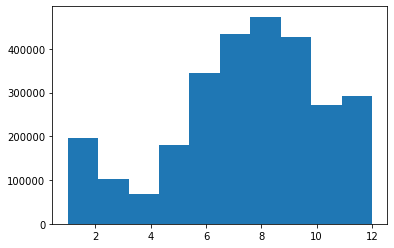

In [57]:
x = dataset_outliersrm['Start Month']
plt.hist(x)
plt.show()

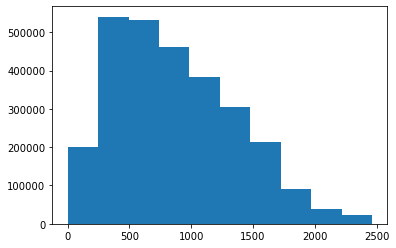

In [58]:
x = dataset_outliersrm['Trip  Duration']
plt.hist(x)
plt.show()

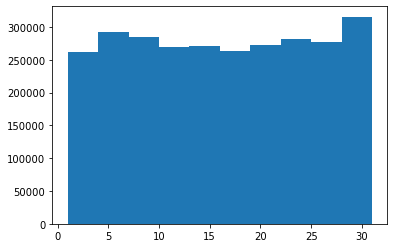

In [59]:
x = dataset_outliersrm['Start Day']
plt.hist(x)
plt.show()

In [67]:
x = dataset_outliersrm['Start Station Name'].head(20)
print(x)

0                          Madison Ave / Bloor St W
1                             College St / Huron St
2                      Parliament St / Aberdeen Ave
3                           King St E / Victoria St
4                             King St E / Jarvis St
5                              Edward St / Yonge St
6                              Edward St / Yonge St
7                Fleet St / Garrison Rd (Fort York)
8                   Toronto Eaton Centre (Yonge St)
9                       York St / Lake Shore Blvd W
10    Bloor GO / UP Station (West Toronto Railpath)
12          Elizabeth St / Edward St (Bus Terminal)
13          Bay St / College St (West Side) - SMART
14                     Dundas St W / St. Patrick St
15                     Dundas St W / St. Patrick St
16                           College St / Borden St
17                             Yonge St / Dundas Sq
18                             Yonge St / Dundas Sq
19                            College St / Major St
20          